<a href="https://colab.research.google.com/github/1218muskan/MLnow_2.0/blob/main/Multivariate%20Linear%20Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DATASET: [Weather in Szeged 2006-2016 ](https://www.kaggle.com/budincsevity/szeged-weather)

**Date Created**: June 20 , 2021

**Author**: Muskan Gupta

**Reach out**:
 [GitHub](https://github.com/1218muskan) | [LinkedIn](https://www.linkedin.com/in/muskan-gupta-a05523204)

 **Mail ID**- 1218.muskangupta@gmail.com

[[Course Repository](https://github.com/1218muskan/MLnow_2.0)]

In [2]:
cd '/content/drive/MyDrive/Learning_ML/GirlScript Foundation/EDA'

/content/drive/MyDrive/Learning_ML/GirlScript Foundation/EDA


In [3]:
ls

cleanedDataset.csv  StudentsPerformance.csv  weatherHistory.csv
Student/            TitanicDataset/


In [4]:
import pandas as pd 
import numpy as np 
import tensorflow as tf 
from tensorflow import keras 
import os 

In [5]:
weatherData = pd.read_csv('weatherHistory.csv') #load the csv file as dataframe

In [6]:
weatherData.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [7]:
weatherData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


## Data Processing

Filling Null values

In [8]:
weatherData.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [9]:
weatherData['Precip Type'].value_counts(ascending=False)

rain    85224
snow    10712
Name: Precip Type, dtype: int64

In [10]:
# Filling Null Values with the most often value i.e. 'rain'
weatherData['Precip Type'].fillna('rain',inplace=True)

In [11]:
weatherData.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


Categoric to numeric Conversion

In [12]:
# checking no. of unique values in each column
for column in weatherData.columns:
  print(column,':', len(weatherData[column].unique()) ) 

Formatted Date : 96429
Summary : 27
Precip Type : 2
Temperature (C) : 7574
Apparent Temperature (C) : 8984
Humidity : 90
Wind Speed (km/h) : 2484
Wind Bearing (degrees) : 360
Visibility (km) : 949
Loud Cover : 1
Pressure (millibars) : 4979
Daily Summary : 214


In [13]:
#converting categoriacl values in 'Precip type' column to numeric

weatherData['Precip Type'] = weatherData['Precip Type'].apply({'rain':1, 'snow':0}.get)

In [14]:
#converting categoriacl values in 'summary' column to numeric

from sklearn import preprocessing
enc = preprocessing.LabelEncoder()
enc.fit(weatherData['Summary'])   
enc.classes_

array(['Breezy', 'Breezy and Dry', 'Breezy and Foggy',
       'Breezy and Mostly Cloudy', 'Breezy and Overcast',
       'Breezy and Partly Cloudy', 'Clear',
       'Dangerously Windy and Partly Cloudy', 'Drizzle', 'Dry',
       'Dry and Mostly Cloudy', 'Dry and Partly Cloudy', 'Foggy',
       'Humid and Mostly Cloudy', 'Humid and Overcast',
       'Humid and Partly Cloudy', 'Light Rain', 'Mostly Cloudy',
       'Overcast', 'Partly Cloudy', 'Rain', 'Windy', 'Windy and Dry',
       'Windy and Foggy', 'Windy and Mostly Cloudy', 'Windy and Overcast',
       'Windy and Partly Cloudy'], dtype=object)

In [15]:
weatherData["Summary"] = enc.transform(weatherData["Summary"])

In [16]:
weatherData.head(10)

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,19,1,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,19,1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,17,1,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,19,1,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,17,1,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
5,2006-04-01 05:00:00.000 +0200,19,1,9.222222,7.111111,0.85,13.9587,258.0,14.9569,0.0,1016.66,Partly cloudy throughout the day.
6,2006-04-01 06:00:00.000 +0200,19,1,7.733333,5.522222,0.95,12.3648,259.0,9.9820,0.0,1016.72,Partly cloudy throughout the day.
7,2006-04-01 07:00:00.000 +0200,19,1,8.772222,6.527778,0.89,14.1519,260.0,9.9820,0.0,1016.84,Partly cloudy throughout the day.
8,2006-04-01 08:00:00.000 +0200,19,1,10.822222,10.822222,0.82,11.3183,259.0,9.9820,0.0,1017.37,Partly cloudy throughout the day.
9,2006-04-01 09:00:00.000 +0200,19,1,13.772222,13.772222,0.72,12.5258,279.0,9.9820,0.0,1017.22,Partly cloudy throughout the day.


In [17]:
multi_WeatherData=weatherData[['Summary','Precip Type','Temperature (C)', 'Humidity','Wind Speed (km/h)' , 'Wind Bearing (degrees)' ,'Visibility (km)','Pressure (millibars)' ]]

In [18]:
multi_WeatherData

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
0,19,1,9.472222,0.89,14.1197,251.0,15.8263,1015.13
1,19,1,9.355556,0.86,14.2646,259.0,15.8263,1015.63
2,17,1,9.377778,0.89,3.9284,204.0,14.9569,1015.94
3,19,1,8.288889,0.83,14.1036,269.0,15.8263,1016.41
4,17,1,8.755556,0.83,11.0446,259.0,15.8263,1016.51
...,...,...,...,...,...,...,...,...
96448,19,1,26.016667,0.43,10.9963,31.0,16.1000,1014.36
96449,19,1,24.583333,0.48,10.0947,20.0,15.5526,1015.16
96450,19,1,22.038889,0.56,8.9838,30.0,16.1000,1015.66
96451,19,1,21.522222,0.60,10.5294,20.0,16.1000,1015.95


In [19]:
# multi_WeatherData.to_csv('multivariate_WeatherData.csv')

## Data Visulaization

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
multi_WeatherData.columns #columns in the dataframe

Index(['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
      dtype='object')

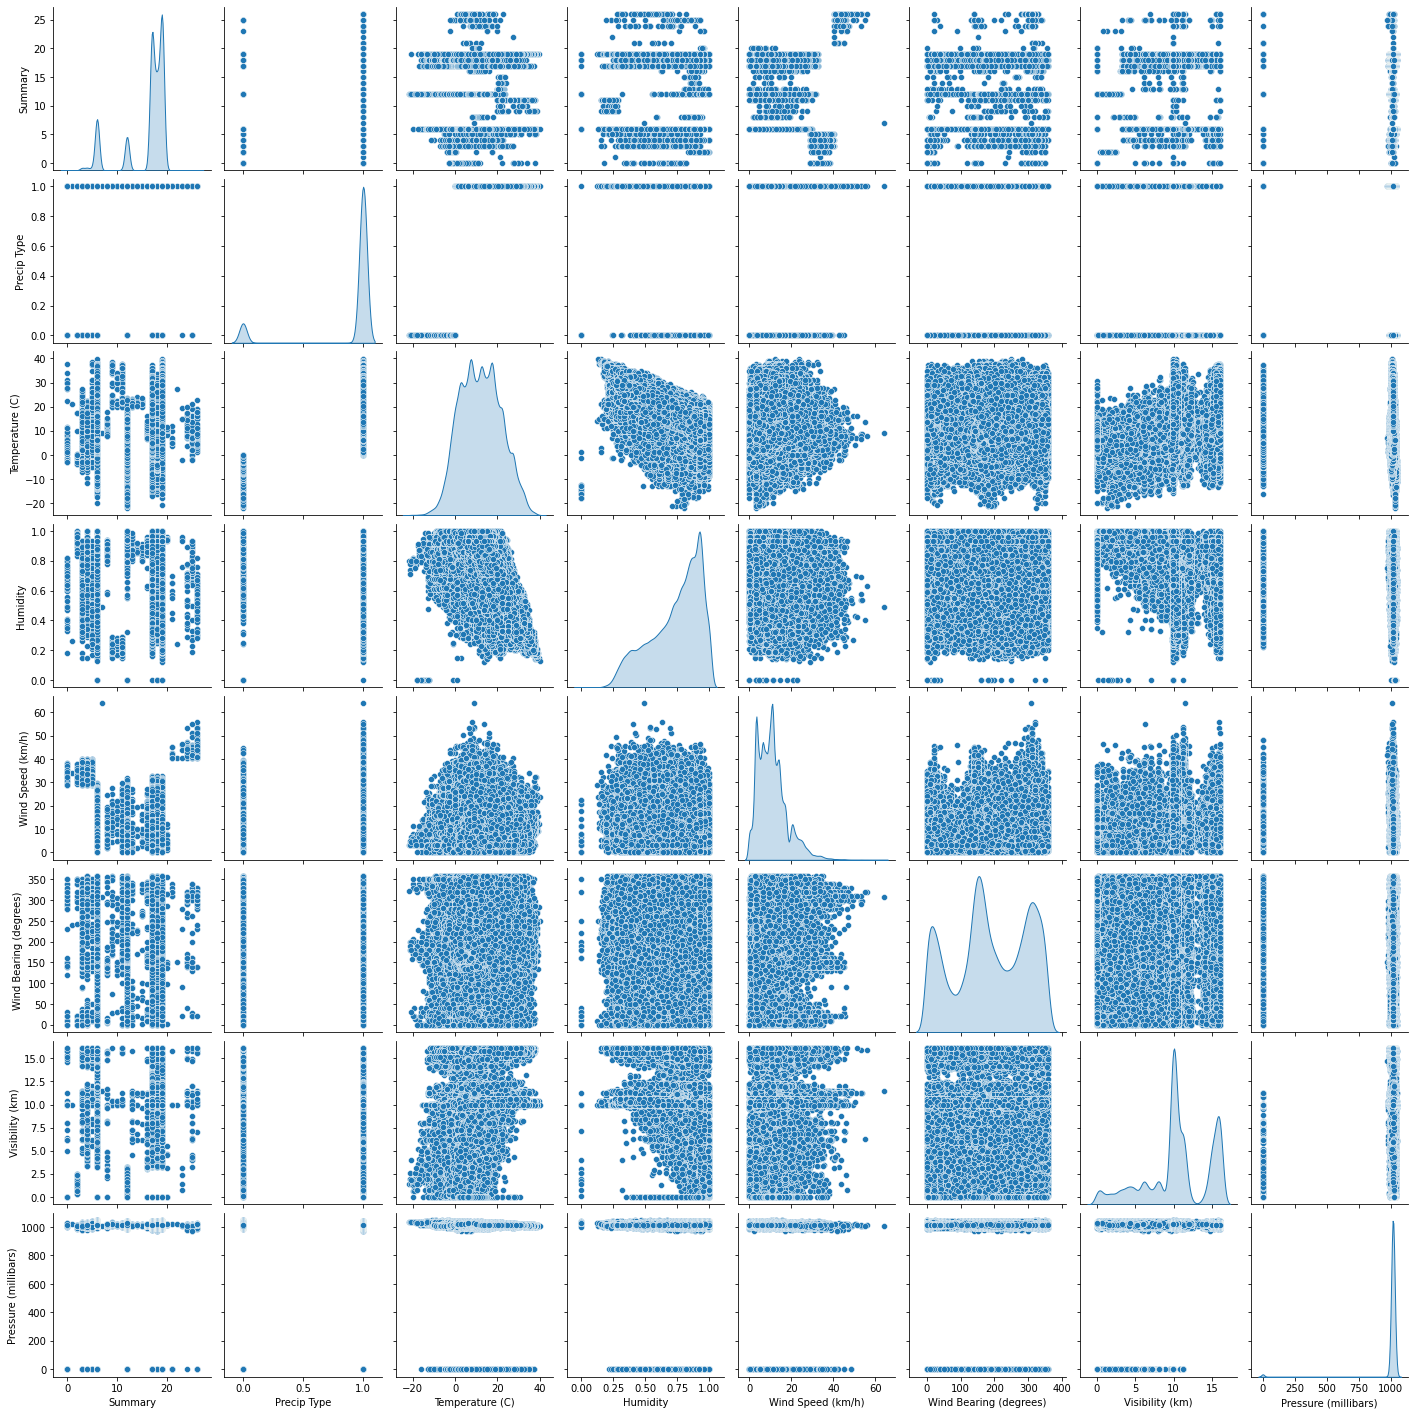

In [22]:
#pairplot for all the values

sns.pairplot(multi_WeatherData,
             x_vars = ['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
             y_vars = ['Summary', 'Precip Type', 'Temperature (C)', 'Humidity',
       'Wind Speed (km/h)', 'Wind Bearing (degrees)', 'Visibility (km)',
       'Pressure (millibars)'],
       diag_kind='kde'
             )

In [24]:
# Correalation
multi_WeatherData.corr()

,Summary,Precip Type,Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars)
Summary,1.000000,0.115673,0.146658,-0.113119,0.004258,0.022789,0.140138,0.143405
Precip Type,0.115673,1.000000,0.562620,-0.232113,0.067928,0.041984,0.312875,-0.009008
Temperature (C),0.146658,0.562620,1.000000,-0.632255,0.008957,0.029988,0.392847,-0.005447
Humidity,-0.113119,-0.232113,-0.632255,1.000000,-0.224951,0.000735,-0.369173,0.005454
Wind Speed (km/h),0.004258,0.067928,0.008957,-0.224951,1.000000,0.103822,0.100749,-0.049263
Wind Bearing (degrees),0.022789,0.041984,0.029988,0.000735,0.103822,1.000000,0.047594,-0.011651
Visibility (km),0.140138,0.312875,0.392847,-0.369173,0.100749,0.047594,1.000000,0.059818
Pressure (millibars),0.143405,-0.009008,-0.005447,0.005454,-0.049263,-0.011651,0.059818,1.000000


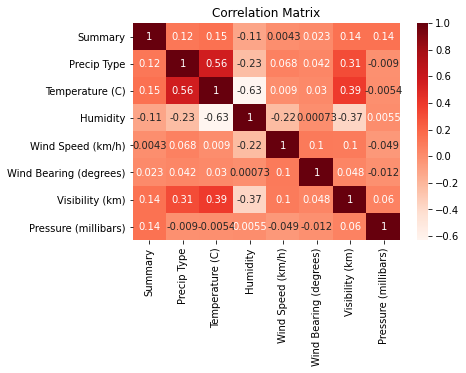

In [25]:
sns.heatmap(multi_WeatherData.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

## Data Splits

In [26]:
#70-30 train-test percent split

trainDataset = multi_WeatherData.sample(frac=0.7, random_state=0) 
testDataset = multi_WeatherData.drop(trainDataset.index)

print(trainDataset.head())
print(testDataset.head())

       Summary  Precip Type  ...  Visibility (km)  Pressure (millibars)
6119        17            1  ...          15.8263               1013.12
51443       17            1  ...          11.2700               1021.10
18754       17            1  ...           9.9820               1018.37
34070       17            1  ...           3.5420               1019.00
26082       17            1  ...           9.9820               1026.67

[5 rows x 8 columns]
    Summary  Precip Type  ...  Visibility (km)  Pressure (millibars)
2        17            1  ...          14.9569               1015.94
7        19            1  ...           9.9820               1016.84
10       19            1  ...          11.2056               1017.42
13       19            1  ...          11.2700               1017.48
16       19            1  ...          11.2700               1016.15

[5 rows x 8 columns]


In [27]:
print(trainDataset.shape)
print(testDataset.shape)

(67517, 8)
(28936, 8)


In [28]:
#copy the trainDataset dataframe for getting the features

trainFeatures = trainDataset.copy()
testFeatures = testDataset.copy()

print(trainFeatures.head())
print(testFeatures.head())

       Summary  Precip Type  ...  Visibility (km)  Pressure (millibars)
6119        17            1  ...          15.8263               1013.12
51443       17            1  ...          11.2700               1021.10
18754       17            1  ...           9.9820               1018.37
34070       17            1  ...           3.5420               1019.00
26082       17            1  ...           9.9820               1026.67

[5 rows x 8 columns]
    Summary  Precip Type  ...  Visibility (km)  Pressure (millibars)
2        17            1  ...          14.9569               1015.94
7        19            1  ...           9.9820               1016.84
10       19            1  ...          11.2056               1017.42
13       19            1  ...          11.2700               1017.48
16       19            1  ...          11.2700               1016.15

[5 rows x 8 columns]


In [29]:
#removing the Temperature column and saving it into the labels variable

trainLabels = trainFeatures.pop('Temperature (C)')
testLabels = testFeatures.pop('Temperature (C)')

print(trainLabels.head())
print(testLabels.head())

6119     14.422222
51443    12.155556
18754    23.961111
34070    15.000000
26082    12.800000
Name: Temperature (C), dtype: float64
2      9.377778
7      8.772222
10    16.016667
13    17.333333
16    15.388889
Name: Temperature (C), dtype: float64


In [30]:
print(trainFeatures.head())
print(testFeatures.head())

       Summary  Precip Type  ...  Visibility (km)  Pressure (millibars)
6119        17            1  ...          15.8263               1013.12
51443       17            1  ...          11.2700               1021.10
18754       17            1  ...           9.9820               1018.37
34070       17            1  ...           3.5420               1019.00
26082       17            1  ...           9.9820               1026.67

[5 rows x 7 columns]
    Summary  Precip Type  ...  Visibility (km)  Pressure (millibars)
2        17            1  ...          14.9569               1015.94
7        19            1  ...           9.9820               1016.84
10       19            1  ...          11.2056               1017.42
13       19            1  ...          11.2700               1017.48
16       19            1  ...          11.2700               1016.15

[5 rows x 7 columns]


## Model Development

In [31]:
import math
numFeatures = len(trainFeatures.columns)
inputNeurons = math.ceil(2*(numFeatures)/3)
print(inputNeurons)

5


In [32]:
model = tf.keras.Sequential([
                             tf.keras.layers.Dense(units = inputNeurons, activation = 'relu'),
                             tf.keras.layers.Dense(units = 2*inputNeurons, activation='relu'),
                             tf.keras.layers.Dense(1)
])

In [33]:
model.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001),
    loss = 'mean_absolute_error',
    metrics = ['mae', 'mse']
)

In [36]:
numEpochs = 100
history = model.fit(x = trainFeatures, y = trainLabels, validation_data=(testFeatures, testLabels), epochs = numEpochs)

Epoch 1/100
2110/2110 [==============================] - 4s 2ms/step - loss: 4.6435 - mae: 4.6435 - mse: 34.2779 - val_loss: 4.6203 - val_mae: 4.6203 - val_mse: 34.5959
Epoch 2/100
2110/2110 [==============================] - 4s 2ms/step - loss: 4.6366 - mae: 4.6366 - mse: 34.2410 - val_loss: 4.6135 - val_mae: 4.6135 - val_mse: 33.5273
Epoch 3/100
2110/2110 [==============================] - 3s 2ms/step - loss: 4.6474 - mae: 4.6474 - mse: 34.3872 - val_loss: 4.5825 - val_mae: 4.5825 - val_mse: 33.5742
Epoch 4/100
2110/2110 [==============================] - 3s 2ms/step - loss: 4.6404 - mae: 4.6404 - mse: 34.3008 - val_loss: 4.6671 - val_mae: 4.6671 - val_mse: 35.4331
Epoch 5/100
2110/2110 [==============================] - 3s 2ms/step - loss: 4.6546 - mae: 4.6546 - mse: 34.4173 - val_loss: 4.5783 - val_mae: 4.5783 - val_mse: 33.3931
Epoch 6/100
2110/2110 [==============================] - 4s 2ms/step - loss: 4.6414 - mae: 4.6414 - mse: 34.2665 - val_loss: 4.5707 - val_mae: 4.5707 - val

## Result Analysis

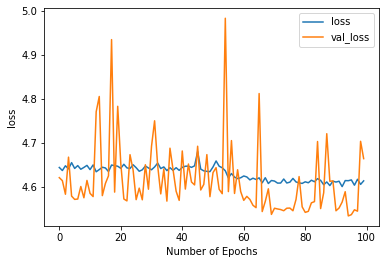

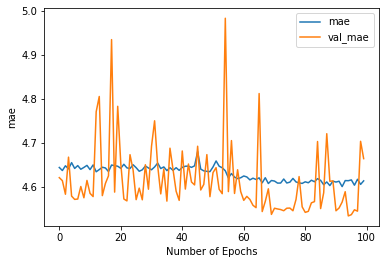

In [37]:
#Plot Functions

def pltGr(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history[f'val_{string}'])
  plt.xlabel('Number of Epochs')
  plt.ylabel(string)
  plt.legend([string, f'val_{string}'])
  plt.show()

pltGr(history, 'loss')
pltGr(history, 'mae')

In [38]:
testPreds = model.predict(testFeatures).flatten()
print(testPreds)

[11.787802  9.721574 16.056108 ... 26.64622  27.580223 21.91178 ]


In [39]:
print(np.array(testLabels))
print(len(testLabels))

[ 9.37777778  8.77222222 16.01666667 ... 28.86666667 30.99444444
 22.03888889]
28936


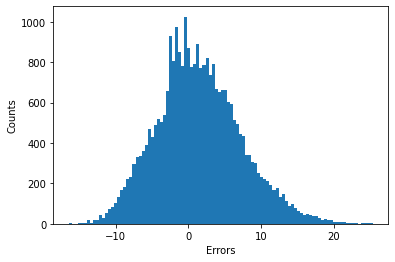

In [41]:
def errorPlot(preds, labels, counts):
  errors = testPreds - testLabels
  plt.hist(errors, counts)
  plt.ylabel('Counts')
  plt.xlabel('Errors')
  plt.show()

errorPlot(testPreds, testLabels, numEpochs)